---
**Autores**: Prof. João Nogueira e Prof. Dino Magri
**Licença deste notebook**:
<br>
<img align="left" width="80" src="https://licensebuttons.net/l/by/3.0/88x31.png" />

<br>
<br>

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)


---

##
#### NOME COMPLETO: MARCIO FERNANDES CRUZ
---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carregando a base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()

from IPython.display import clear_output

import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()

email_logado = gcloud_tokeninfo['email']

clear_output()

In [ ]:
import numpy as np
import pandas as pd

In [1]:
pasta_raiz = '/content/drive/MyDrive/Colab Notebooks/DataSet Data Science/ifood'


In [ ]:
df_orders = pd.read_csv(f'{pasta_raiz}/df_orders.csv', parse_dates=['order_timestamp_local'])
df_orders.head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,...,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11 13:22:06.497000+00:00,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,...,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06 17:57:17.967000+00:00,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,...,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11 20:42:32.058000+00:00,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,...,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...


# Criação da ABT (10 pontos)


### Agregando receita por dia

**(1.5 ponto) `Q1`** Crie um DataFrame chamado `df` que deverá somar o valor total dos pedidos. Utilize a variável `order_timestamp_local` para recuperar a data. Faça o agrupamento por dia e por fim faça a ordenação do menor para o maior.

O resultado esperado é um DataFrame com duas colunas (`order_date` e `receita`).

| order_date 	| receita   	|
|-----------:	|-----------	|
| 2019-06-01 	| 209061.01 	|
| 2019-06-02 	| 213995.65 	|
| 2019-06-03 	| 108973.96 	|


In [ ]:
df_orders['order_date'] = df_orders['order_timestamp_local'].dt.date

df = (
    df_orders
    .groupby("order_date")
    .agg(receita = ('order_total', 'sum'))
    .reset_index()
    .sort_values(by="order_date")
)

df.head(3)


,order_date,receita
0,2019-06-01,209061.01
1,2019-06-02,213995.65
2,2019-06-03,108973.96


**(0.5 ponto) `Q1.1`** Faça um plot da série temporal. Utilize o método `.plot()`.

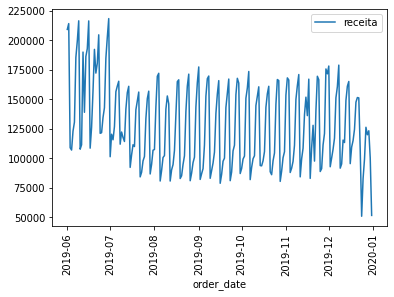

In [ ]:
df.plot(x='order_date', y='receita', rot=90)

### Train-Test Split

**(2.0 ponto) `Q2`** Crie dois dataframes: `df_train` com dados de junho até novembro e `df_test` com dados de dezembro.

In [ ]:
df["order_date"] =  pd.to_datetime(df["order_date"])

#df['order_date'].min()
# df['order_date'].max()

filtro =  (df["order_date"]<'2019-12-01')
df_train = df[filtro]

filtro = (df["order_date"]>='2019-12-01')
df_test = df[filtro]

print(f'Linhas do df_train é {df_train.shape[0]} e do df_test é {df_test.shape[0]}')

Linhas do df_train é 183 e do df_test é 31


<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" />  **CHECKPOINT** - A resposta do exercício deverá ser:

`df_train` deverá ter 183 linhas e `df_test` deverá ter 31 linhas.

### Feature Engineering

#### Variáveis Sazonais

**(2.0 ponto) `Q3`** Crie as seguintes variáveis sazonais para ambos os DataFrames `df_train` e `df_test`:
- `mes`: mês
- `dia`: dia do mês
- `weekday`: dia da semana
- `dayofyear`: dia do ano

In [ ]:
df_train = (df_train
 .assign(mes = df_train["order_date"].dt.month,
         dia = df_train["order_date"].dt.day,
         weekday = df_train["order_date"].dt.weekday,
         dayofyear = df_train["order_date"].dt.dayofyear))

df_test = (df_test
 .assign(mes = df_test["order_date"].dt.month,
         dia = df_test["order_date"].dt.day,
         weekday = df_test["order_date"].dt.weekday,
         dayofyear = df_test["order_date"].dt.dayofyear))




In [ ]:
df_train.head(3)

,order_date,receita,mes,dia,weekday,dayofyear
0,2019-06-01,209061.01,6,1,5,152
1,2019-06-02,213995.65,6,2,6,153
2,2019-06-03,108973.96,6,3,0,154


In [ ]:
df_test.head(3)

,order_date,receita,mes,dia,weekday,dayofyear
183,2019-12-01,178085.12,12,1,6,335
184,2019-12-02,92833.10,12,2,0,336
185,2019-12-03,99995.42,12,3,1,337


#### Variáveis Lag

**(2.0 ponto) `Q4`** Crie as seguintes variáveis de lag para ambos os DataFrames `df_train` e `df_test`:

- `receita_atual`: receita do dia em que a previsão é feita
- `receita_anterior`: receita do dia anterior ao dia em que a previsão é feita
- `diff_receitas`: diferença de receita do dia atual para o dia anterios

Utilize o método `.shift()` da coluna `df['receita']`.  O método `shift()` é utilizada para deslocar o índice pelo número desejado de períodos com uma frequencia de tempo opcional.




In [ ]:
df_train = (df_train
 .assign(receita_atual = df_train["receita"].shift(1))
 .assign(receita_anterior = df_train["receita"].shift(2))
 .assign(diff_receitas = lambda df_em_memoria: df_em_memoria['receita_atual']-df_em_memoria['receita_anterior'])
)

df_train.head(5)

,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas
0,2019-06-01,209061.01,6,1,5,152,NaN,NaN,NaN
1,2019-06-02,213995.65,6,2,6,153,209061.01,NaN,NaN
2,2019-06-03,108973.96,6,3,0,154,213995.65,209061.01,4934.64
3,2019-06-04,106973.23,6,4,1,155,108973.96,213995.65,-105021.69
4,2019-06-05,122957.05,6,5,2,156,106973.23,108973.96,-2000.73


In [ ]:
df_test = (df_test
 .assign(receita_atual = df_test["receita"].shift(1))
 .assign(receita_anterior = df_test["receita"].shift(2))
 .assign(diff_receitas = lambda df_em_memoria: df_em_memoria['receita_atual']-df_em_memoria['receita_anterior'])
)

df_test.head(5)

,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas
183,2019-12-01,178085.12,12,1,6,335,NaN,NaN,NaN
184,2019-12-02,92833.10,12,2,0,336,178085.12,NaN,NaN
185,2019-12-03,99995.42,12,3,1,337,92833.10,178085.12,-85252.02
186,2019-12-04,107698.24,12,4,2,338,99995.42,92833.10,7162.32
187,2019-12-05,117057.18,12,5,3,339,107698.24,99995.42,7702.82


In [ ]:
df_train.shape, df_test.shape

((183, 9), (31, 9))

#### Média Móvel dos últimos 3 dias

**(2.0 ponto) `Q5`** Cria uma variável que representa a média móvel dos últimos 3 dias anteriores ao dia de previsão para ambos os DataFrames `df_train` e `df_test`.

- `media_movel`: média móvel dos últimos 3 dias.

Utilize o método `.rolling(3)` que possibilita realizar cálculos para uma determinada janela deslizante. O valor 3, significa o tamanho da janela que será utilizada para deslizar.


In [ ]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_train:
df_train = (
    df_train
    .assign(media_movel = df_train['receita_atual'].rolling(3).mean())
)
df_train.head()


,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas,media_movel
0,2019-06-01,209061.01,6,1,5,152,NaN,NaN,NaN,NaN
1,2019-06-02,213995.65,6,2,6,153,209061.01,NaN,NaN,NaN
2,2019-06-03,108973.96,6,3,0,154,213995.65,209061.01,4934.64,NaN
3,2019-06-04,106973.23,6,4,1,155,108973.96,213995.65,-105021.69,177343.54
4,2019-06-05,122957.05,6,5,2,156,106973.23,108973.96,-2000.73,143314.28


In [ ]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_test:
df_test = (
    df_test
    .assign(media_movel = df_test['receita_atual'].rolling(3).mean())
)
df_test.head()


,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas,media_movel
183,2019-12-01,178085.12,12,1,6,335,NaN,NaN,NaN,NaN
184,2019-12-02,92833.10,12,2,0,336,178085.12,NaN,NaN,NaN
185,2019-12-03,99995.42,12,3,1,337,92833.10,178085.12,-85252.02,NaN
186,2019-12-04,107698.24,12,4,2,338,99995.42,92833.10,7162.32,123637.880000
187,2019-12-05,117057.18,12,5,3,339,107698.24,99995.42,7702.82,100175.586667


# Modelagem (10 pontos)

Iremos testar diferentes algoritmos de regressão para o problema em questão.

## Criando os conjuntos de treino e teste

**(1.0 ponto) `Q6`** Crie os seguintes dataframes selecionando apenas as colunas `['mes', 'dia', 'weekday', 'dayofyear', 'receita_atual', 'receita_anterior', 'diff_receitas', 'media_movel']` como **features** e a coluna `receita` como **target**. Remova todas as linhas com valores faltantes.

- `X_train`
- `X_test`
- `y_train`
- `y_test`

In [ ]:
features = ['mes', 'dia', 'weekday', 'dayofyear', 'receita_atual', 'receita_anterior', 'diff_receitas', 'media_movel']
target   = 'receita'

Remova os valores faltantes `.dropna()` existentes que foram criados na parte de Feature Engineering e faça a filtragem correspondente utilizando as variáveis `features` e `target`.

In [ ]:
X_train = df_train.dropna().filter(features).copy()
y_train = df_train.dropna()[target]

X_test = df_test.dropna().filter(features).copy()
y_test = df_test.dropna()[target]

print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)

print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (180, 8)
y_train:  (180,)
X_test:  (28, 8)
y_test:  (28,)


<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" />  **CHECKPOINT** - Verifique a quantidade de linhas e colunas para as variáveis `X_train`, `X_test`, `y_train` e `y_test`:

    X_train - (180, 8)
    y_train - (180,)

    X_test - (28, 8)
    y_test - (28,)


## Regressão Linear

**(0.5 ponto) `Q7`** Treine uma regressão linear para o conjunto de treino e salve na variável `lr_model`.

**Obs:** Não esquecer de normalizar as variáveis para modelos lineares, como `Regressão Linear` e `Ridge Regression`.

Utilize o `StandardScaler` para normalizar as variáveis. Utilize a classe `SklearnTransformerWrapper` da biblioteca `feature_engine`.

In [ ]:
!pip install feature_engine

clear_output()

In [ ]:
X_train

,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas,media_movel
3,6,4,1,155,108973.96,213995.65,-105021.69,177343.540000
4,6,5,2,156,106973.23,108973.96,-2000.73,143314.280000
5,6,6,3,157,122957.05,106973.23,15983.82,112968.080000
6,6,7,4,158,130615.30,122957.05,7658.25,120181.860000
7,6,8,5,159,185314.25,130615.30,54698.95,146295.533333
...,...,...,...,...,...,...,...,...
178,11,26,1,330,88803.48,166519.97,-77716.49,141583.280000
179,11,27,2,331,91214.85,88803.48,2411.37,115512.766667
180,11,28,3,332,111371.52,91214.85,20156.67,97129.950000
181,11,29,4,333,121050.43,111371.52,9678.91,107878.933333


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.pipeline import Pipeline


######################################################
# Adicione o código da Regressão Linear via Pipeline #
######################################################

X = X_train
y = y_train

cat_vars = []

modelos_lineares = [
        ('lr', LinearRegression())
        ]

steps_modelos_lineares = [
    ('numeric_scaler', SklearnTransformerWrapper(variables=features, transformer=StandardScaler()))
    ]


aux_steps = steps_modelos_lineares + [modelos_lineares[0]]
pipeline = Pipeline(steps=aux_steps)

lr_model = Pipeline(steps=aux_steps)

In [ ]:
# Execute para criar o modelo
lr_model.fit(X, y)


Pipeline(steps=[('numeric_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['mes', 'dia', 'weekday',
                                                      'dayofyear',
                                                      'receita_atual',
                                                      'receita_anterior',
                                                      'diff_receitas',
                                                      'media_movel'])),
                ('lr', LinearRegression())])

## Criando Função que retorna todas as Métricas

**(1.0 ponto) `Q8`** Crie uma função chamada `log_results` que deverá retornar um DataFrame com todas as métricas de regressão. A função deverá conter os seguintes parâmetros:

- `modelo_objeto` esse parâmetro é obrigatório e tem que ser a variável que representa o objeto do modelo já "fitado".
- `nome_modelo` deverá ser o nome do modelo
- `X_train, X_test, y_train, y_test` são os parâmetros referentes aos conjuntos de treino e teste que serão avaliados.

Lembre-se de criar funções auxiliares para facilitar a criação das métricas.

Exemplo de chamada da função:

    lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)


A saída da função para a regressão linear deverá ser a seguinte:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>modelo</th>
      <th>modo</th>
      <th>r2</th>
      <th>r2_ajustado</th>
      <th>mse</th>
      <th>rmse</th>
      <th>rmsle</th>
      <th>mae</th>
      <th>medae</th>
      <th>mape</th>
      <th>max_error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Regressão Linear</td>
      <td>treino</td>
      <td>0.8518</td>
      <td>0.8449</td>
      <td>184683302.0703</td>
      <td>13589.8235</td>
      <td>0.1024</td>
      <td>10438.1981</td>
      <td>8183.7347</td>
      <td>0.0814</td>
      <td>57688.0425</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Regressão Linear</td>
      <td>teste</td>
      <td>0.5458</td>
      <td>0.3545</td>
      <td>447617025.0598</td>
      <td>21156.9616</td>
      <td>0.2217</td>
      <td>18787.5085</td>
      <td>16495.3045</td>
      <td>0.1762</td>
      <td>38496.7851</td>
    </tr>
  </tbody>
</table>

In [ ]:
lr_results = pd.DataFrame(columns=['r2', 'r2_ajustado', 'mse', 'rmse', 'rmsle',  'mae', 'medae', 'mape', 'max_error'])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error

pd.options.display.float_format = '{:.4f}'.format

def adjusted_r2(y_esperado, y_previsto, X_treino):
  R2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

def get_metricas(modelo, modo, y_previsto, y_esperado):
  return dict(modelo = modelo,
              modo = modo,
              r2 = r2_score(y_esperado, y_previsto),
              r2_ajustado = adjusted_r2(y_esperado, y_previsto, X_train),
              mse = mean_squared_error(y_esperado, y_previsto),
              rmse = mean_squared_error(y_esperado, y_previsto, squared=False),
              rmsle = mean_squared_log_error(y_esperado, y_previsto, squared=False),
              mae = mean_absolute_error(y_esperado, y_previsto),
              medae = median_absolute_error(y_esperado, y_previsto),
              mape = mean_absolute_percentage_error(y_esperado, y_previsto),
              maximo_error = max_error(y_esperado, y_previsto)
  )


def log_results(modelo_objeto, nome_modelo, X_train, X_test, y_train, y_test):
  y_previsto = modelo_objeto.predict(X_train)
  y_esperado = y_train.copy()
  df_treino = pd.DataFrame([get_metricas(nome_modelo, 'treino', y_previsto, y_esperado)])

  y_previsto = modelo_objeto.predict(X_test)
  y_esperado = y_test.copy()
  df_teste = pd.DataFrame([get_metricas(nome_modelo, 'teste', y_previsto, y_esperado)])

  return pd.concat([df_treino, df_teste])


def log_validacao(modelo_objeto, nome_modelo, X_test, y_test):
  y_previsto = modelo_objeto.predict(X_test)
  y_esperado = y_test.copy()

  return pd.DataFrame([get_metricas(nome_modelo, 'validação', y_previsto, y_esperado)])


**(0.5 ponto) `Q8.1`** Aplique a função desenvolvida anteriormente para o modelo `lr_model` criado no exercício `Q7`. Salve o retorno da função na variável `lr_results`.

In [ ]:
lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)
lr_results

,modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,maximo_error
0,Regressão Linear,treino,0.8518,0.8449,184683302.0703,13589.8235,0.1024,10438.1981,8183.7347,0.0814,57688.0425
0,Regressão Linear,teste,0.5458,0.3545,447617025.0598,21156.9616,0.2217,18787.5085,16495.3045,0.1762,38496.7851


## Ridge Regression

**(1.0 ponto) `Q9`** Treine uma [Ridge Regression](https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer) (Regressão Linear menos susceptível ao overfitting) para o conjunto de treino e salve na variável `ridge_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `ridge_results`.

**Obs:** Não esquecer de normalizar as variáveis para modelos lineares, como `Regressão Linear` e `Ridge Regression`.

In [ ]:
from sklearn.linear_model import Ridge
from feature_engine.imputation import ArbitraryNumberImputer, MeanMedianImputer
from sklearn.preprocessing import PolynomialFeatures

ridge_model = Pipeline(steps=[
                              ('numeric_imputer', MeanMedianImputer(variables=features, imputation_method='mean')),
                              ('scaling', SklearnTransformerWrapper(variables=features, transformer=StandardScaler())),
                              ('model', Ridge())])
ridge_model.fit(X, y)

# continue o código abaixo
ridge_results = log_results(ridge_model, 'Ridge Regression', X_train, X_test, y_train, y_test)

In [ ]:
# Configurações para os modelos de árvore
steps_modelos_arvores = [
    ('numeric_imputer', MeanMedianImputer(variables=features, imputation_method='mean'))
]

## Decision Tree

**(1.0 ponto) `Q10`**  Treine uma Decision Tree para o conjunto de treino e salve na variável `tree_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `tree_results`.

Utilize os parâmetros `random_state=30` e `max_depth=3`.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

tree_model = Pipeline(steps=[('model', DecisionTreeRegressor(random_state=30, max_depth=3))])
tree_model.fit(X, y)

# continue o código abaixo
tree_results = log_results(tree_model, 'Decision Tree', X_train, X_test, y_train, y_test)

## Random Forest

**(1.0 ponto) `Q11`** Treine uma Random Forest para o conjunto de treino e salve na variável `rf_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `rf_results`.

Utilize os parâmetros `random_state=30` e `max_depth=3`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[('model', RandomForestRegressor(random_state=30, max_depth=3))])
rf_model.fit(X, y)

# continue o código abaixo
random_forest_results = log_results(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)

## LGBM

**(1.0 ponto) `Q12`** Treine um LighGBM para o conjunto de treino e salve na variável `lgbm_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `lgbm_results`.

Utilize os parâmetros `random_state=30`

In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = Pipeline(steps=[
                                ('scaling', SklearnTransformerWrapper(transformer=StandardScaler(), variables=features)),
                              ('model', LGBMRegressor(random_state=30))])
lgbm_model.fit(X, y)

# continue o código abaixo
lgbm_results = log_results(lgbm_model, 'LGBM', X_train, X_test, y_train, y_test)

## XGBoost

**(1.0 ponto) `Q13`** Treine um XGBoost para o conjunto de treino e salve na variável `xgb_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `xgb_results`.

Utilize os parâmetros `random_state=30`



In [ ]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[('model', XGBRegressor(random_state=30))])
xgb_pipeline.fit(X, y)

# continue o código abaixo
xgm_results = log_results(xgb_pipeline, 'XGBoost', X_train, X_test, y_train, y_test)

[19:30:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## CatBoost

**(1.0 ponto) `Q14`** Treine um CatBoost para o conjunto de treino e salve na variável `cat_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `cat_results`.

Utilize os parâmetros `random_state=30`

PS: não esqueça de executar a linha para instalar a biblioteca `catboost`.

In [ ]:
!pip install catboost==0.25.1

clear_output()

In [ ]:
from catboost import CatBoostRegressor

cat_pipeline = Pipeline(steps=[('model', CatBoostRegressor(random_state=30))])
cat_pipeline.fit(X, y)

clear_output()

# continue o código abaixo
cat_results = log_results(cat_pipeline, 'CatBoost', X_train, X_test, y_train, y_test)

## Juntando todos os resultados

**(0.5 ponto) `Q15`** Consolide todos os resultados acima em uma única tabela. Dica: use a função `pd.concat()`.

In [ ]:
df_resultado_consolidado = pd.concat([lr_results, ridge_results, tree_results, random_forest_results, lgbm_results, xgm_results, cat_results])

lista = []
def retorna_descricao(df_teste):
  lista.append("No modo {}, o modelo na {}a posição é {}".format(df_teste["modo"], int(df_teste["ranking"]), df_teste["modelo"]))

In [ ]:
df_resultado_consolidado.query("modo == 'teste'")

,modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,maximo_error
0,Regressão Linear,teste,0.5458,0.3545,447617025.0598,21156.9616,0.2217,18787.5085,16495.3045,0.1762,38496.7851
0,Ridge Regression,teste,0.6553,0.5102,339686747.4264,18430.5927,0.1958,15391.8553,12434.6155,0.1541,38550.1485
0,Decision Tree,teste,0.6025,0.4351,391733754.2567,19792.2650,0.2104,14953.6309,11020.4228,0.1612,52571.6967
0,Random Forest,teste,0.6497,0.5022,345215267.3708,18579.9695,0.2025,13758.3794,10473.3440,0.1513,47754.2742
0,LGBM,teste,0.6670,0.5268,328178439.0652,18115.6959,0.2041,12544.3478,6593.6708,0.1442,50350.6658
0,XGBoost,teste,0.5173,0.3140,475709696.1073,21810.7702,0.2316,15371.5294,9879.5217,0.1742,55779.2288
0,CatBoost,teste,0.4278,0.1869,563852411.6851,23745.5767,0.2474,17455.2397,13120.2484,0.1955,61458.2479


**(0.5 ponto) `Q16`** Qual o modelo que apresentou o melhor R2 ajustado na base de treino?

In [ ]:
df_resultado_teste = (
    df_resultado_consolidado[df_resultado_consolidado["modo"]=="treino"]
    .assign(ranking = lambda df_em_memoria: df_em_memoria["r2_ajustado"].rank(ascending=False))
    .sort_values(by="ranking")
    .query("ranking==1")
    )

lista = []
df_resultado_teste.apply(retorna_descricao, axis=1)
lista

['No modo treino, o modelo na 1a posição é CatBoost']

**(0.5 ponto) `Q17`** Qual o modelo que apresentou o melhor R2 ajustado na base de teste?

In [ ]:
df_resultado_teste = (
    df_resultado_consolidado[df_resultado_consolidado["modo"]=="teste"]
    .assign(ranking = lambda df_em_memoria: df_em_memoria["r2_ajustado"].rank(ascending=False))
    .sort_values(by="ranking")
    .query("ranking==1")
    )

lista = []
df_resultado_teste.apply(retorna_descricao, axis=1)
lista

['No modo teste, o modelo na 1a posição é LGBM']

**(0.5 ponto) `Q18`** Qual o modelo que devemos considerar para realizar as otimizações e por que?

In [ ]:
(
    df_resultado_consolidado
    .query('modo=="treino"')
    .sort_values(by="r2_ajustado", ascending=False)
    .head(7)
)

,modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,maximo_error
0,CatBoost,treino,0.9992,0.9991,1045179.7029,1022.3403,0.0083,813.3584,672.5766,0.0066,3094.8139
0,XGBoost,treino,0.9880,0.9875,14920027.9569,3862.6452,0.0296,2791.0446,2037.9273,0.0220,16954.8050
0,LGBM,treino,0.9723,0.9710,34574302.9413,5879.9917,0.0420,3772.2253,2222.6024,0.0292,31189.2364
0,Random Forest,treino,0.9372,0.9343,78288006.4591,8848.0510,0.0676,6261.5504,5111.0617,0.0499,48377.4788
0,Decision Tree,treino,0.9237,0.9202,95070777.7824,9750.4245,0.0737,6746.0072,4908.5190,0.0532,48890.9530
0,Regressão Linear,treino,0.8518,0.8449,184683302.0703,13589.8235,0.1024,10438.1981,8183.7347,0.0814,57688.0425
0,Ridge Regression,treino,0.8420,0.8346,196989965.3840,14035.3114,0.1026,10672.7649,8595.2779,0.0819,61691.8485


In [ ]:
(
    df_resultado_consolidado
    .query('modo=="teste"')
    .sort_values(by="r2_ajustado", ascending=False)
    .head(10)
)

,modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,maximo_error
0,LGBM,teste,0.6670,0.5268,328178439.0652,18115.6959,0.2041,12544.3478,6593.6708,0.1442,50350.6658
0,Ridge Regression,teste,0.6553,0.5102,339686747.4264,18430.5927,0.1958,15391.8553,12434.6155,0.1541,38550.1485
0,Random Forest,teste,0.6497,0.5022,345215267.3708,18579.9695,0.2025,13758.3794,10473.3440,0.1513,47754.2742
0,Decision Tree,teste,0.6025,0.4351,391733754.2567,19792.2650,0.2104,14953.6309,11020.4228,0.1612,52571.6967
0,Regressão Linear,teste,0.5458,0.3545,447617025.0598,21156.9616,0.2217,18787.5085,16495.3045,0.1762,38496.7851
0,XGBoost,teste,0.5173,0.3140,475709696.1073,21810.7702,0.2316,15371.5294,9879.5217,0.1742,55779.2288
0,CatBoost,teste,0.4278,0.1869,563852411.6851,23745.5767,0.2474,17455.2397,13120.2484,0.1955,61458.2479


**Resposta:** O melhor modelo é o LGBM pois apresentou um melhor resultado na base de Teste. <br>
Apesar de todos os indicadores de erros estarem proximos, o MEDAE deste modelo está melhor.

# Otimização dos hiperparâmetros (5 pontos)

## Grid Search do Melhor Modelo

**(1.5 ponto) `Q19`** Realize um grid search do melhor modelo de acordo com o R2 ajustado na base de teste.

Escolha pelo menos 5 hiperparâmetros para serem otimizados. Cada um desses hiperparâmetros deverá testar ao menos dois valores.

O algoritmo que melhor ajustou o modelo foi LightGBM. Para identificar os hiperparâmetros veja na documentação - https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

Utilize o `random_state=30`.

**Os parâmetros do `GridSearchCV` fica a seu critério.**

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

def get_df_comparacao(best_model, X, y):
  y_previsto = best_model.predict(X)
  y_esperado = y.copy()

  validacao_results = log_validacao(best_model, 'LGBM',  X, y)

  return (
      pd.concat([validacao_results, lgbm_results])
      .sort_values(by="r2_ajustado", ascending=False)
  )

In [ ]:
from pandas.core.common import random_state
parametros = {
  'model__learning_rate': [0.5, 0.6],
  'model__n_estimators': [100, 200],
  'model__max_bin':[255, 510], #
  'model__max_depth' : [5, 7],
  'model__num_leaves':[20, 30], #
  'model__colsample_bytree': [0.6, 0.1],
  'model__random_state': [30],
  'model__alpha': [5, 10],
  'model__class_weight': ['balanced', None],
  'model__fit_intercept': [True, False],
}

random_state=30

t1 = time.time()
grid_search = GridSearchCV(lgbm_model, parametros, scoring=adjusted_r2, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X,y)

clear_output()
print('Melhores parâmetros: ', grid_search.best_params_)
print('\nTempo Execução: {} segundos'.format(time.time() - t1))

best_pipeline = grid_search.best_estimator_

best_pipeline.fit(X, y)

df_comparacao = get_df_comparacao(best_pipeline, X, y)
df_comparacao.head(3)

Melhores parâmetros:  {'model__alpha': 5, 'model__class_weight': 'balanced', 'model__colsample_bytree': 0.6, 'model__fit_intercept': True, 'model__learning_rate': 0.5, 'model__max_bin': 255, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__num_leaves': 20, 'model__random_state': 30}

Tempo Execução: 66.04484939575195 segundos


,modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape,maximo_error
0,LGBM,validação,0.9951,0.9949,6099561.3531,2469.7290,0.0193,1796.8499,1336.4297,0.0145,10547.8959
0,LGBM,treino,0.9723,0.9710,34574302.9413,5879.9917,0.0420,3772.2253,2222.6024,0.0292,31189.2364
0,LGBM,teste,0.6670,0.5268,328178439.0652,18115.6959,0.2041,12544.3478,6593.6708,0.1442,50350.6658


**(1.0 ponto) `Q20`** Veja se o melhor modelo tunado apresenta uma melhor performance do que o modelo original. Faça as considerações sobre os resultados obtidos.

In [ ]:
valor_validacao = df_comparacao[df_comparacao["modo"]=='validação']["r2_ajustado"]
valor_teste = df_comparacao[df_comparacao["modo"]=='teste']["r2_ajustado"]

print(f'Na Validação o resultado foi {valor_validacao[0]} e no Teste foi {valor_teste[0]}')

if (valor_validacao[0]>valor_teste[0]):
  print('Portanto, o modelo pode ser considerado para ser posto em Produção')
else:
  print('Não é aconselhável por este Modelo em Produção. Aconselhamos revisar a configuração dos hiperparâmetros e/ou melhorar a Qualidade dos Dados')

Na Validação o resultado foi 0.9948774289864032 e no Teste foi 0.5267743593734386
Portanto, o modelo pode ser considerado para ser posto em Produção


## Feature Importance

**(0.5 ponto) `Q21`** Quais são as duas features mais importantes para o modelo (`lgbm_model`)? Crie um gráfico de barras na horizontal com a feature mais importante no topo e a menos importante na base do gráfico.

As duas features mais importantes são a Diferença de Receitas (diff_receitas) e Média Móvel (media_movel


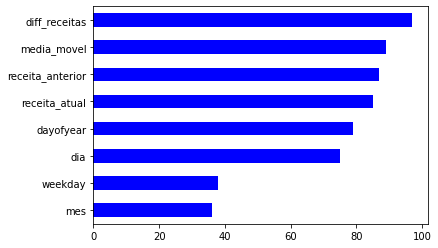

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

encoder = best_pipeline.named_steps["scaling"]
columns = encoder.transform(X).columns
model =  best_pipeline.named_steps["model"]

importance = model.feature_importances_

combination = pd.Series(importance, columns)

combination.sort_values().plot.barh(color="blue")


print("As duas features mais importantes são a Diferença de Receitas (diff_receitas) e Média Móvel (media_movel)")

**Diff_receitas e Media Movel**

## Shap Values

**(0.5 ponto) `Q22`** Execute as linhas de código abaixo e interprete o gráfico `shap values`.

In [ ]:
!pip install shap
clear_output()

import shap

In [ ]:
model =  best_pipeline.named_steps["model"]
explainer = shap.TreeExplainer(model=model)

In [ ]:
shap_values = explainer.shap_values(X_test)

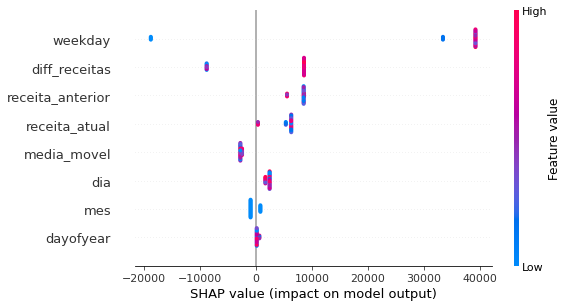

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
print('O dia da semana (weekday) é um fator de suma importãncia que explica o total de Receita, mas não é a feature mais importante do modelo, no caso, é a diff_receitas')
print('O segundo fator que mais explica é a media móvel mas, em suma, é um reflexo dos ultimos 3 dias.')

O dia da semana (weekday) é um fator de suma importãncia que explica o total de Receita, mas não é a feature mais importante do modelo, no caso, é a diff_receitas
O segundo fator que mais explica é a media móvel mas, em suma, é um reflexo dos ultimos 3 dias.
